In [2]:
from fastai import *
from fastai.vision import *
import numpy as np
import pandas as pd
import os
import math
import copy
import time
import datetime
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image


In [5]:
os.getcwd()

'C:\\Users\\chiaming\\Desktop\\python'

In [12]:

folder = 'bored'
file = 'urls_bored.txt'

In [16]:

folder = 'surprise'
file = 'urls_surprise.txt'

In [5]:
folder = "angry"
file = "urls_angry.txt"

In [37]:

folder = 'happy'
file = 'urls_happy.txt'

In [6]:
path = Path('data/emotion')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [7]:
path.ls()

[WindowsPath('data/emotion/angry'),
 WindowsPath('data/emotion/bored'),
 WindowsPath('data/emotion/happy'),
 WindowsPath('data/emotion/labels.csv'),
 WindowsPath('data/emotion/models'),
 WindowsPath('data/emotion/surprise')]

In [29]:
print(dest/file)

data\emotion\happy\urls_happy.txt


In [8]:
classes = ['bored','surprise','angry','happy']

In [21]:
path.ls()

[WindowsPath('data/emotion/angry'),
 WindowsPath('data/emotion/bored'),
 WindowsPath('data/emotion/happy'),
 WindowsPath('data/emotion/labels.csv'),
 WindowsPath('data/emotion/models'),
 WindowsPath('data/emotion/surprise')]

In [28]:
download_images(dest/file,dest, max_pics=500)

In [9]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

bored


surprise


angry


happy


In [12]:
path

WindowsPath('data/emotion')

In [4]:
df = pd.read_csv(path/'labels.csv')
df.tail()

NameError: name 'path' is not defined

In [14]:
image = df.iloc[0,2]
print('該圖片有'+str(len(image.split(' ')))+'個數值')
image = image.split(' ')

該圖片有2304個數值


該圖片有2304個數值


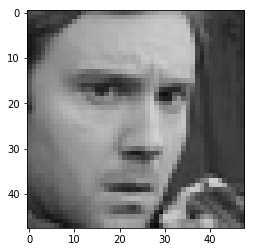

In [46]:
image = df.iloc[0,2]
print('該圖片有'+str(len(image.split(' ')))+'個數值')
image = image.split(' ')

x = np.mat(image)
x = x.reshape(48,48)
img = Image.fromarray(x.astype(np.uint8), 'L') 
plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')

In [48]:
y=np.array(img)
im=Image.fromarray(y.astype(np.uint8), 'L') 
im.show()

In [21]:
np.where(df.iloc[:,1]=="Training")[0]

array([    0,     1,     2,     3, ..., 28705, 28706, 28707, 28708], dtype=int64)

In [5]:
df_train = df.iloc[np.where(df.iloc[:,1]=="Training")[0]]
df_val = df.iloc[np.where(df.iloc[:,1]=="PrivateTest")[0]]
df_test = df.iloc[np.where(df.iloc[:,1]=="PublicTest")[0]]

In [6]:
df_train = df_train.drop(' Usage',axis=1)
df_val = df_val.drop(' Usage',axis=1)
df_test = df_test.drop(' Usage',axis=1)

In [23]:
os.mkdir('train')
print(os.getcwd())

C:\Users\chiaming\Desktop\python


In [ ]:
data1 = ['train','val','test']
for file in data1:
    os.mkdir(file)
   # save = pd.DataFrame(np.zeros(shape=(48,48)))
   # target = globals()['df_'+file].iloc[:,1]
    for label in range(7):
        if(label in [6]):
            os.mkdir(file+'/'+str(label))
            globals()['emotion'+str(label)] = globals()['df_'+file].iloc[np.where(globals()['df_'+file].iloc[:,0]==label)[0],1].values
            for face in range(len(globals()['emotion'+str(label)])):
                face_data= np.mat(globals()['emotion'+str(label)][face].split(' '))
                face_data = np.reshape(face_data,(48,48))
                   # contain = pd.DataFrame(np.zeros(shape=(48,48)))
                   # counter = 0
               # for row in range(48):
               #     for col in range(48):
               #         contain.iloc[row,col] = face_data[counter]
               #         counter += 1
                x = face_data
                img = Image.fromarray(x.astype(np.uint8), 'L') 
                plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')
                plt.savefig(file+'/'+str(label)+'/'+str(face)+'.png')
                print('【'+file+'】'+'['+str(label)+'] 共'+str(face)+'張圖片')

In [ ]:
df_train.iloc[1,1]

In [18]:
x = pd.DataFrame(np.zeros(shape=(48,48)))
da= df_train.iloc[10,1].split(' ')
counter = 0
for row in range(48):
    for col in range(48):
        x.iloc[row,col] = da[counter]
        counter += 1

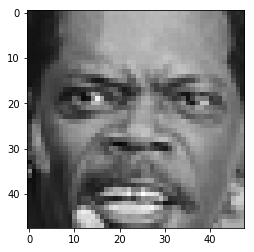

In [21]:
x = np.array(x)
img = Image.fromarray(x.astype(np.uint8), 'L') 
plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')
plt.savefig('testtt.png')

In [ ]:
df_train_data = ImageDataBunch.from_csv(path,ds_tfms=df_train,size=48)

In [10]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [7]:
data.classes

['angry', 'bored', 'happy', 'surprise']

In [ ]:
np.zeros(shape=(48,48))

In [ ]:
data.show_batch(rows=3, figsize=(20,20))

In [12]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate,opt_func=optim.Adam)

In [13]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.757842,1.197959,0.458055,33:27
1,1.311566,1.006924,0.423163,30:42


In [35]:
learn.save('adam-1')

In [ ]:
learn.load('stage-1')

In [27]:
learn.unfreeze()

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


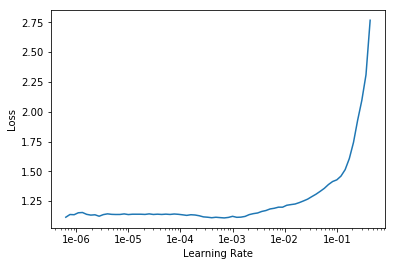

In [29]:
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [30]:
interp = ClassificationInterpretation.from_learner(learn)

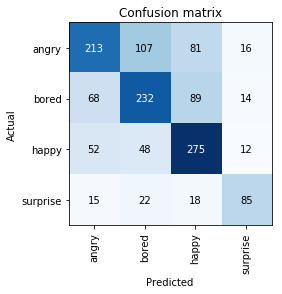

In [31]:
interp.plot_confusion_matrix()

In [33]:
print("【引用Kaggle資料集第一次訓練結果v1.0】")
print("憤怒:"+str(round(213/(213+107+81+16),2)*100)+"%")
print("無聊:"+(str(round(232/(68+232+89+14),2)*100))+"%")
print("開心:"+str(round(275/(52+48+275+12),2)*100)+"%")
print("驚訝:"+str(round(85/(15+22+18+85),2)*100)+"%")
print("整體:"+str(round((213+232+275+85)/(213+107+81+16+68+232+89+14+52+48+275+12+15+22+18+85),2)*100)+'%')

【引用Kaggle資料集第一次訓練結果v1.0】
憤怒:51.0%
無聊:57.99999999999999%
開心:71.0%
驚訝:61.0%
整體:60.0%


In [21]:
(15+20+50+27)/(15+6+7+3+12+20+8+8+6+4+50+7+4+7+4+27+15+20+50+27)

0.37333333333333335

## 第二次訓練

In [36]:
learn.fit_one_cycle(1, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.939434,0.790324,0.307350,40:42


In [37]:
learn.save('stage-5')

In [3]:
learn.load('stage-5')

NameError: name 'learn' is not defined

In [38]:
learn.unfreeze()

In [39]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


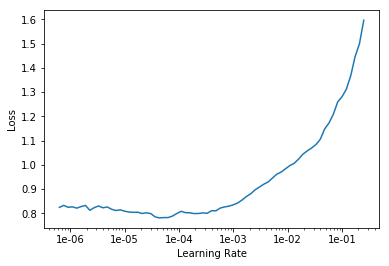

In [40]:
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [41]:
interp = ClassificationInterpretation.from_learner(learn)

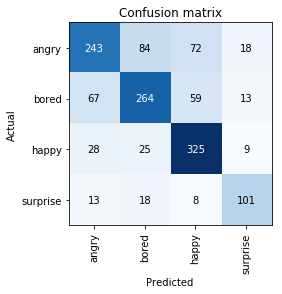

In [42]:
interp.plot_confusion_matrix()

In [1]:
print("憤怒:"+str(round(243/(243+84+72+18),2)*100)+"%")
print("無聊:"+(str(round(264/(67+264+59+13),2)*100))+"%")
print("開心:"+str(round(325/(28+25+325+9),2)*100)+"%")
print("驚訝:"+str(round(101/(13+18+8+101),2)*100)+"%")
print("整體:"+str(round((243+264+325+101)/(243+84+72+18+67+264+59+13+28+25+325+9+13+18+8+101),2)*100)+'%')

憤怒:57.99999999999999%
無聊:66.0%
開心:84.0%
驚訝:72.0%
整體:69.0%


In [41]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


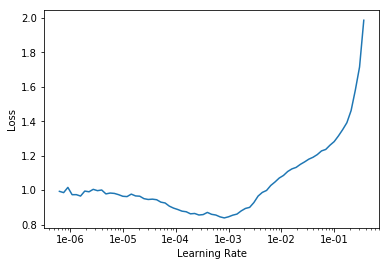

In [43]:
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [44]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()